In [31]:
!git add Record_Linkage_Comparison_Patterns.ipynb
!git commit -m "projet"
!git push origin master

[master adb1ae8] projet
 1 file changed, 25 insertions(+), 4 deletions(-)
fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


# Présentation des données

In [1]:
documentation = open('./donation/documentation', 'r')
print(documentation.read())

1. Title: Record Linkage Comparison Patterns 

2. Source Information
   -- Underlying records: Epidemiologisches Krebsregister NRW
      (http://www.krebsregister.nrw.de)
   -- Creation of comparison patterns and gold standard classification:
      Institute for Medical Biostatistics, Epidemiology and Informatics (IMBEI),
      University Medical Center of Johannes Gutenberg University, Mainz, Germany
      (http://www.imbei.uni-mainz.de) 
   -- Donor: Murat Sariyar, Andreas Borg (IMBEI)    
   -- Date: September 2008
 
3. Past Usage:
    1. Irene Schmidtmann, Gael Hammer, Murat Sariyar, Aslihan Gerhold-Ay:
       Evaluation des Krebsregisters NRW Schwerpunkt Record Linkage. Technical
       Report, IMBEI 2009. 
       http://www.krebsregister.nrw.de/fileadmin/user_upload/dokumente/Evaluation/EKR_NRW_Evaluation_Abschlussbericht_2009-06-11.pdf
       -- Describes the external evaluation of the registry's record linkage
          procedures.
       -- The comparison patterns in this data

# Prélèvement des données

In [2]:
import pandas as pd

dfs = []
for i in range(1, 11):
    dfs.append(pd.read_csv('./donation/block_{}.csv'.format(i)))
    print('Le fichier block_{}.csv est enfin importé avec succès'.format(i))

df = []
df = pd.concat(dfs, ignore_index=True)

Le fichier block_1.csv est enfin importé avec succès
Le fichier block_2.csv est enfin importé avec succès
Le fichier block_3.csv est enfin importé avec succès
Le fichier block_4.csv est enfin importé avec succès
Le fichier block_5.csv est enfin importé avec succès
Le fichier block_6.csv est enfin importé avec succès
Le fichier block_7.csv est enfin importé avec succès
Le fichier block_8.csv est enfin importé avec succès
Le fichier block_9.csv est enfin importé avec succès
Le fichier block_10.csv est enfin importé avec succès


In [3]:
df.shape

(5749132, 12)

In [4]:
df.head()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,37291,53113,0.833333333333333,?,1.0,?,1,1,1,1,0,True
1,39086,47614,1,?,1.0,?,1,1,1,1,1,True
2,70031,70237,1,?,1.0,?,1,1,1,1,1,True
3,84795,97439,1,?,1.0,?,1,1,1,1,1,True
4,36950,42116,1,?,1.0,1,1,1,1,1,1,True


In [5]:
df.tail()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
5749127,32517,73116,1,?,0.222222,?,1,0,1,0,0,False
5749128,67707,83757,0.111111111111111,?,1.000000,?,1,0,0,0,0,False
5749129,53258,91808,1,?,0.000000,?,1,0,0,1,0,False
5749130,31865,85285,1,?,0.111111,?,1,0,1,0,0,False
5749131,33119,76399,1,?,0.000000,?,1,0,1,0,0,False


In [6]:
df.describe(include='all')

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
count,5.749132e+06,5.749132e+06,5749132,5749132,5.749132e+06,5749132,5.749132e+06,5749132,5749132,5749132,5749132,5749132
unique,NaN,NaN,55,31,NaN,37,NaN,3,3,3,3,2
top,NaN,NaN,1,?,NaN,?,NaN,0,0,0,0,False
freq,NaN,NaN,3508203,5645434,NaN,5746668,NaN,4458035,2938232,4467903,5704575,5728201
mean,3.332449e+04,6.658744e+04,NaN,NaN,3.156278e-01,NaN,9.550014e-01,NaN,NaN,NaN,NaN,NaN
std,2.365986e+04,2.362049e+04,NaN,NaN,3.342336e-01,NaN,2.073011e-01,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,6.000000e+00,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1.329700e+04,5.005700e+04,NaN,NaN,1.000000e-01,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,2.912400e+04,7.067400e+04,NaN,NaN,1.818182e-01,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,5.028300e+04,8.647500e+04,NaN,NaN,4.285714e-01,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['id_1', 'id_2', 'cmp_fname_c1', 'cmp_fname_c2', 'cmp_lname_c1',
       'cmp_lname_c2', 'cmp_sex', 'cmp_bd', 'cmp_bm', 'cmp_by', 'cmp_plz',
       'is_match'],
      dtype='object')

# Traitement des données

## Générer un duplicata des données

In [8]:
import copy

df_copie = copy.deepcopy(df)

df_copie.shape

(5749132, 12)

## Noter les valeurs inconnues 

In [9]:
df_inconnu = pd.DataFrame(columns=['id_1', 'id_2'])
df_inconnu['id_1'] = df['id_1']
df_inconnu['id_2'] = df['id_2']

for colonne in df.columns:
    colonne_inconnue = colonne + '_inconnu'
    df_inconnu[colonne_inconnue] = df[colonne].apply(
        lambda x: 1 if x == '?' else 0)

df_inconnu.drop(['id_1_inconnu', 'id_2_inconnu'], axis=1, inplace=True)

df_inconnu.sample()

,id_1,id_2,cmp_fname_c1_inconnu,cmp_fname_c2_inconnu,cmp_lname_c1_inconnu,cmp_lname_c2_inconnu,cmp_sex_inconnu,cmp_bd_inconnu,cmp_bm_inconnu,cmp_by_inconnu,cmp_plz_inconnu,is_match_inconnu
1603058,33034,71271,0,1,0,1,0,0,0,0,0,0


In [10]:
df_inconnu.shape

(5749132, 12)

## Remplacer les valeurs inconnues par une valeur chiffrée

In [11]:
import numpy as np

for colonne in df.columns:
    if (df[colonne].dtype == np.dtype('O')):
        df[colonne] = df[colonne].apply(lambda x: 0.0 if x == '?' else x)
    df[colonne] = df[colonne].astype(float)
df['id_1'] = df['id_1'].astype(int)
df['id_1'] = df['id_1'].astype(str)
df['id_2'] = df['id_2'].astype(int)
df['id_2'] = df['id_2'].astype(str)
df['is_match'] = df['is_match'].astype(int)

df.sample(5)

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
3013448,22049,65617,1.000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0
3249756,25198,35739,1.000,0.0,0.142857,0.0,1.0,1.0,0.0,0.0,0.0,0
1974126,24344,75259,1.000,0.0,0.111111,0.0,1.0,1.0,0.0,0.0,0.0,0
1009003,3125,62027,0.000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0
863716,28285,43271,0.375,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0


In [12]:
df_inconnu.shape

(5749132, 12)

In [13]:
df.describe(include='all')

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
count,5749132,5749132,5.749132e+06,5.749132e+06,5.749132e+06,5.749132e+06,5.749132e+06,5.749132e+06,5.749132e+06,5.749132e+06,5.749132e+06,5.749132e+06
unique,97282,97311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3843,93718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,735,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.127776e-01,1.623376e-02,3.156278e-01,1.364674e-04,9.550014e-01,2.244342e-01,4.887877e-01,2.227178e-01,5.516311e-03,3.640724e-03
std,NaN,NaN,3.888388e-01,1.251994e-01,3.342336e-01,1.008120e-02,2.073011e-01,4.172092e-01,4.998743e-01,4.160704e-01,7.406674e-02,6.022848e-02
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,2.857143e-01,0.000000e+00,1.000000e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,1.000000e+00,0.000000e+00,1.818182e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,1.000000e+00,0.000000e+00,4.285714e-01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Modifier des noms de colonnes

In [14]:
nouvelles_colonnes = [
    'id_1', 'id_2', 'Prénom_id_1', 'Prénom_id_2', 'Nom_id_1', 'Nom_id_2',
    'Sexe', 'Jour_naissance', 'Mois_naissance', 'Année_naissance',
    'code_postal', 'is_match'
]
df.columns = nouvelles_colonnes

# Visualisation initiale des données

/Users/haozhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/haozhang/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/haozhang/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/haozhang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

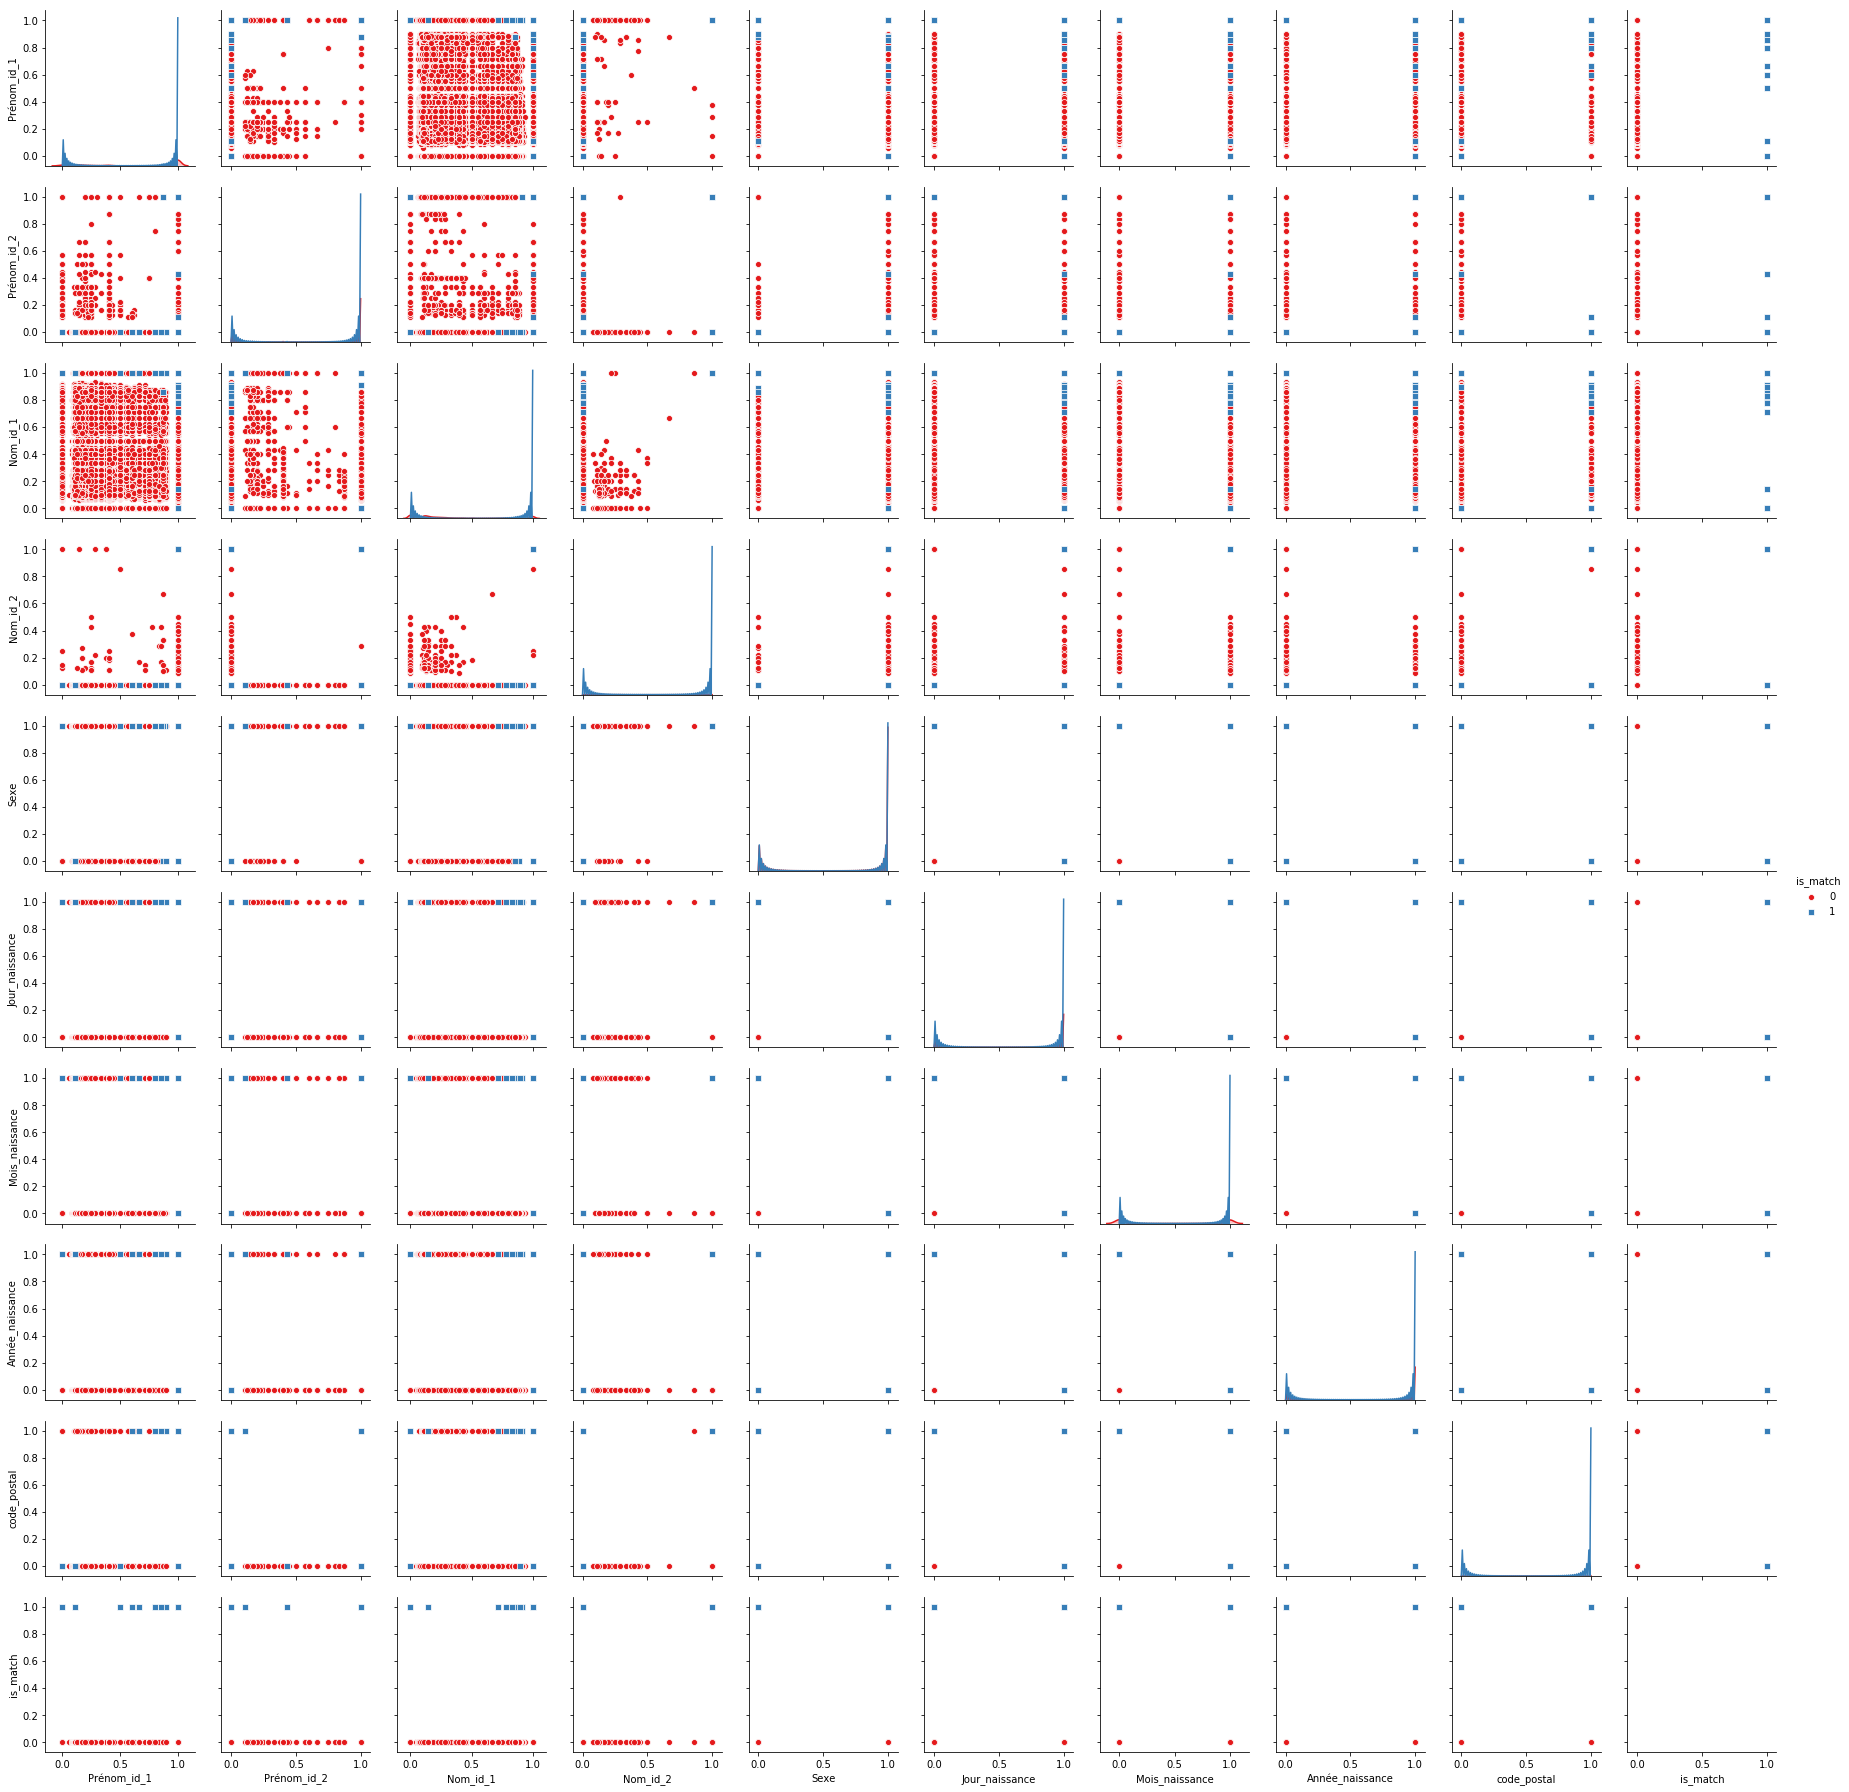

In [15]:
import seaborn as sns
%matplotlib inline
sns.pairplot(
    df.iloc[:, 2:].sample(frac=0.1, random_state=1),
    hue='is_match',
    markers=["o", "s"],
    palette="Set1")

# Scikit Learn

## Séparer le jeu d'apprentissage du jeu de test

In [16]:
colonnes_X = list(df.columns)
colonnes_X.remove('id_1')
colonnes_X.remove('id_2')
colonnes_X.remove('is_match')
colonnes_X

['Prénom_id_1',
 'Prénom_id_2',
 'Nom_id_1',
 'Nom_id_2',
 'Sexe',
 'Jour_naissance',
 'Mois_naissance',
 'Année_naissance',
 'code_postal']

In [17]:
X = df[colonnes_X]
X.sample()

,Prénom_id_1,Prénom_id_2,Nom_id_1,Nom_id_2,Sexe,Jour_naissance,Mois_naissance,Année_naissance,code_postal
161323,1.0,0.0,0.222222,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
colonne_y = 'is_match'

In [19]:
y = df[colonne_y]
y.sample()

5617468    0
Name: is_match, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [21]:
X_train.shape

(3851918, 9)

In [22]:
X_test.shape

(1897214, 9)

In [23]:
y_train.shape

(3851918,)

In [24]:
y_test.shape

(1897214,)

## Construire un arbre de décision

In [25]:
from sklearn import tree

arbre_d = tree.DecisionTreeClassifier()
arbre_d.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prédiction et évaluation

In [26]:
predictions = arbre_d.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('##################### Validation #####################\n')
print('Matrice de confusion :\n', confusion_matrix(y_test, predictions))
print('Précision :\n', round(accuracy_score(y_test, predictions), 3))
print('rapport de classification :\n',
      classification_report(y_test, predictions))

##################### Validation #####################

Matrice de confusion :
 [[1890262      18]
 [     23    6911]]
Précision :
 1.0
rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1890280
           1       1.00      1.00      1.00      6934

   micro avg       1.00      1.00      1.00   1897214
   macro avg       1.00      1.00      1.00   1897214
weighted avg       1.00      1.00      1.00   1897214



## Visualiser un arbre de décision

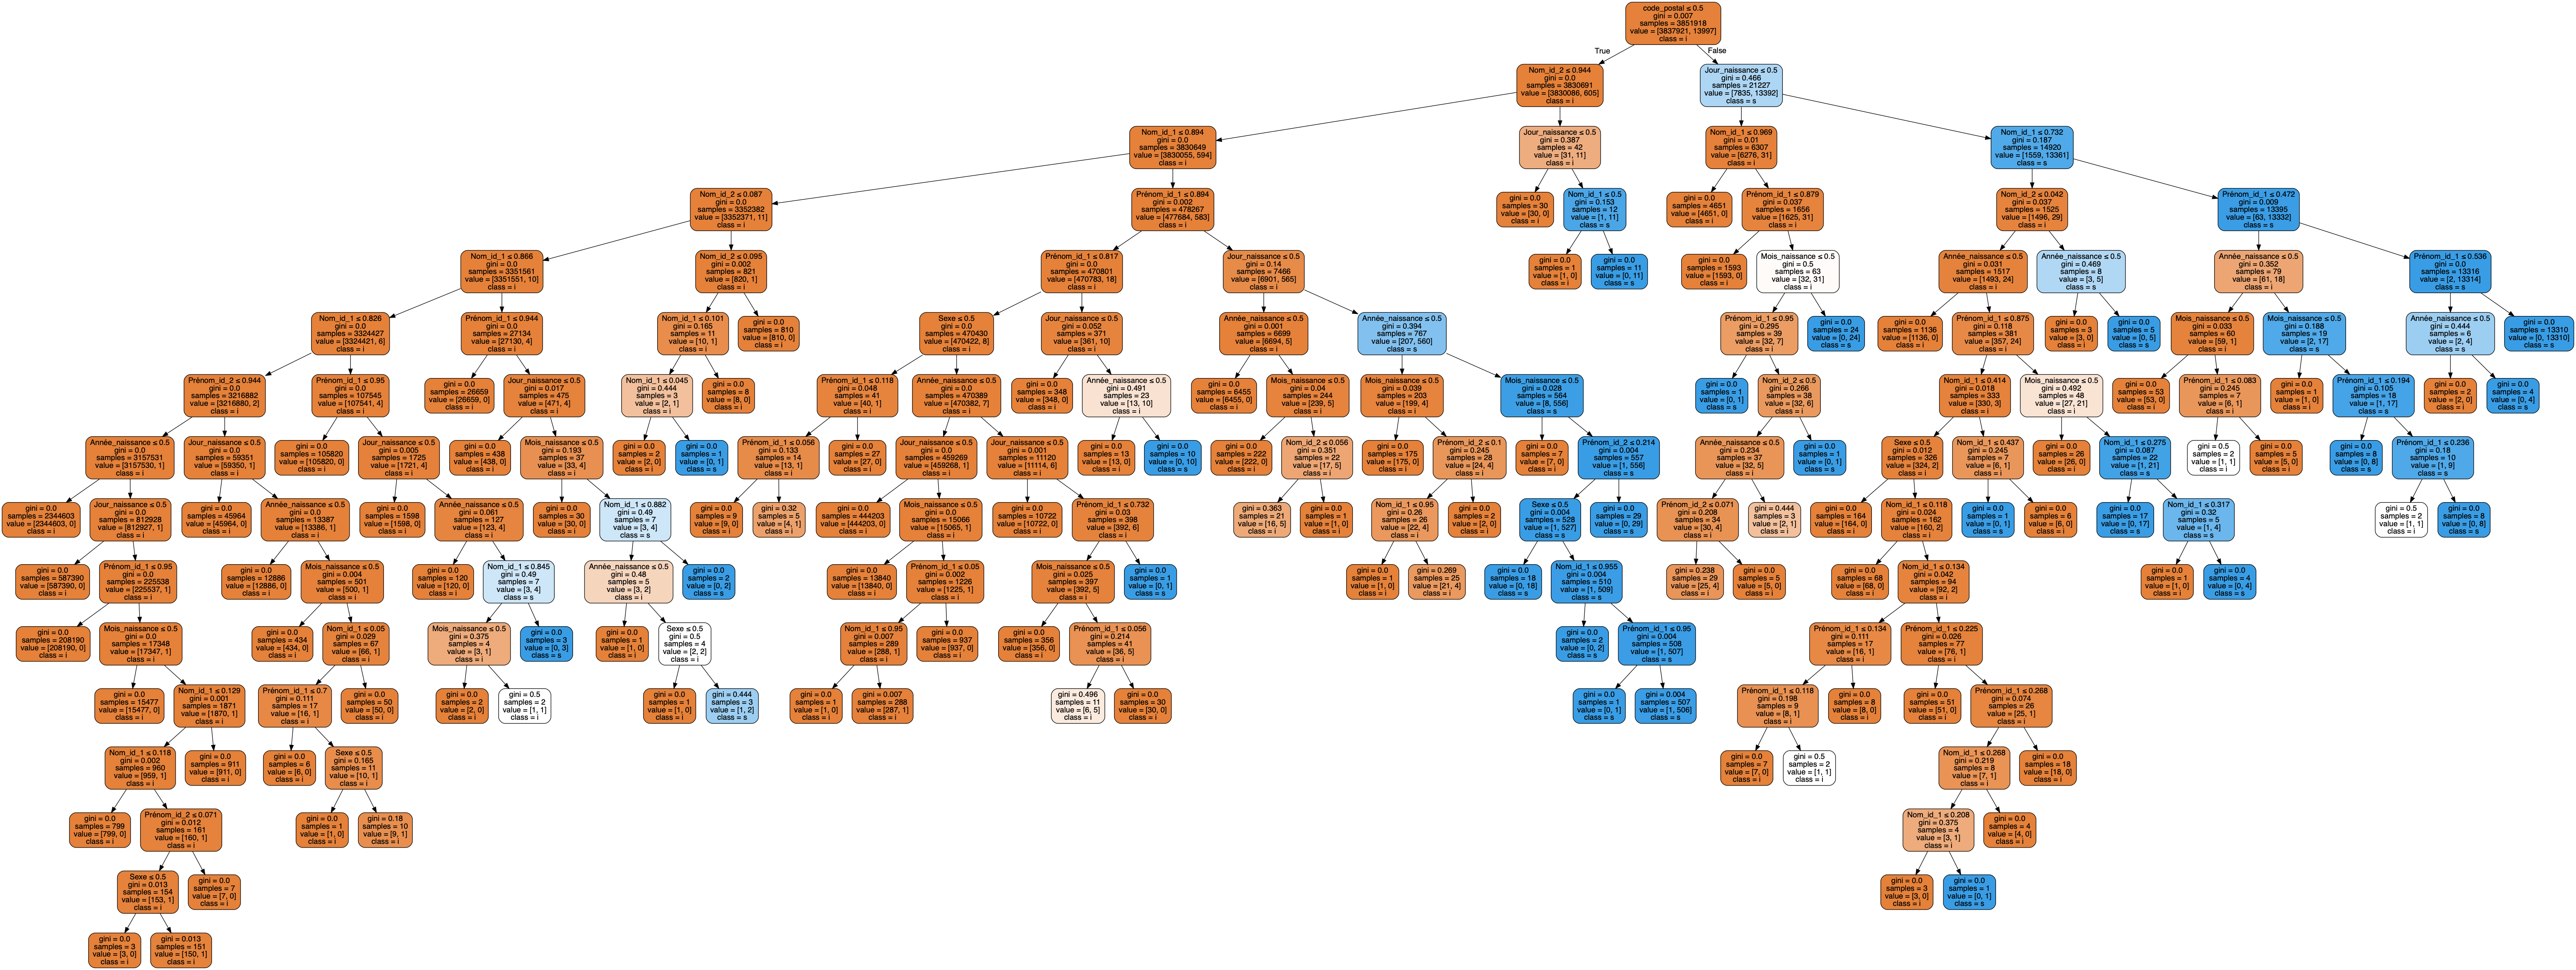

In [28]:
import graphviz  ### brew install graphviz (pour macos)
import pydotplus  ### pip install pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(
    arbre_d,
    out_file=None,
    feature_names=colonnes_X,
    class_names=colonne_y,
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())